# Machine Learning Engineer Nanodegree

## Capstone Project : Bank Direct Marketing

Welcome to my capstone project of the Machine Learning Engineer Nanodegree!

A Portuguese bank had experienced a revenue decline. It was found the root cause is that bank’s customers are not depositing as frequently as before.  
 
A term deposits benefits a bank in the following way: 
1. It can invest the deposits in those financial products which lead to higher gain; so as to make a profit which is higher than the cost associated with deposits.  
2. Secondly, more the term deposit customers higher is the probability that a bank can upsell or cross sell other products to further increase revenues.  
 
Hence, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and thus focus marketing effort on such clients. 

Note : The project is based on the earlier submitted proposal (filename : proposal.pdf),link to proposal review https://review.udacity.com/#!/reviews/1175994

## Getting Started

##### Datasets and Inputs 

The dataset we strive to use in the capstone project is from the UC Irvine Machine Learning Repository and holds information related to a direct marketing campaign of the previously described Portuguese bank. 
It was obtained by downloading bank-additional-full.csv (contained in bank-additional.zip) from https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. 

##### Shape of the Dataset 
The table contains 41,188 rows (i.e., tuples describing telemarketing interaction) and 21 columns (i.e., features of each interaction). 

##### Solution Statement 
The output variable (y) is having binary response which means either the customer will subscribe for a term deposit or not. Therefore, I will use a classification approach to predict which customers are more likely to subscribe for term deposits. 

The methods I will attempt to try are (i) logistic regression & (ii) naïve bayes. 

My solution will aim for the following two outcomes:  
i) Determining which variables are important  
ii) Implementing the classifier  
to predict if a customer will subscribe for a term deposit

## Data Preparation

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

c:\users\i039335\appdata\local\continuum\anaconda3\envs\py3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Load the data from CSV file
data = pd.read_csv('bank-additional-full.csv', header=0)

# Print the shape of data
print(data.shape)

# Print the names of the columns or the variables
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [20]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [21]:
# Check missing values and the data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Observations:

<ul>
<li>There are 10 continous variables 5 of type interger and 5 of type float</li>
<li>There are 10 variables of type "object" and these are categorical variables</li>
<li>No missing values</li>    
</ul>

## Data Exploration

### Statistics for Continous Variables

In [507]:
# Summary statistics of continous variables
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Observations:

<ul>
<li>The feature 'pdays' has many '999' (missing) values..</li>
<li>'previous' = 0 for most of the data</li>
<li>Remaining numerical features seem OK</li>
<li>The age of the customers ranges from 17 years to 98 years with mean around 40 years old</li>  
</ul>

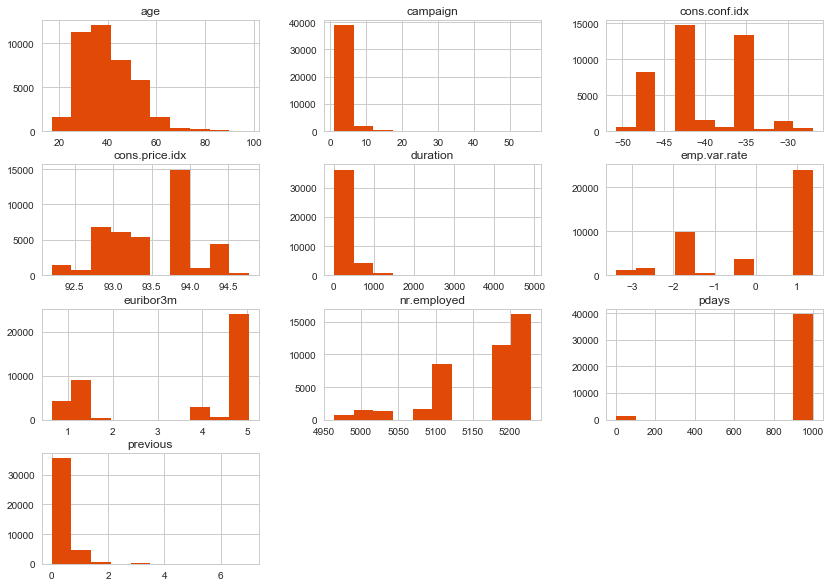

In [508]:
# Visualization of numerical data distribution
import matplotlib.pyplot as plt

data.hist(bins=10, figsize=(14,10), color='#E14906')
plt.show()

### Statistics for Categorical Features

In [509]:
data.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


Observations:

<ul>
<li>The top job type is admin with a total count of 10422</li>
<li>60.52% of the customers are married</li>
<li>29.54% of the customers are possessing a university degree</li>
<li>79% of the customers have no default</li>
<li>52% of the customers have a housing loan</li>
<li>82% of the customers do not have a personal loan</li> 
<li>Most contacts to the customer were made in the month of May</li>
<li>21% of contacts to the customer were made in on a thursday</li>
<li>Outcome of the previous marketing campaign does not exist for majority of the customers i.e. 86%</li> 
<li>Key factor here to note is that majority of the customers i.e. 88% of them have not actually subscribed to a term deposit. Thus, we can see that only 4640 customers have actually subscribed</li>    
</ul>

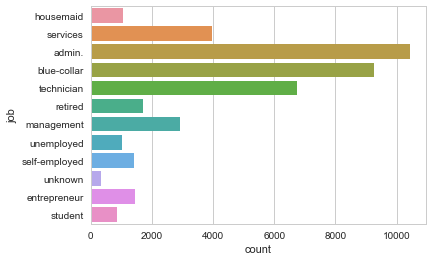

In [510]:
# The top job type is admin with a total count of 10422
sns.countplot(y="job", data=data)
plt.show()

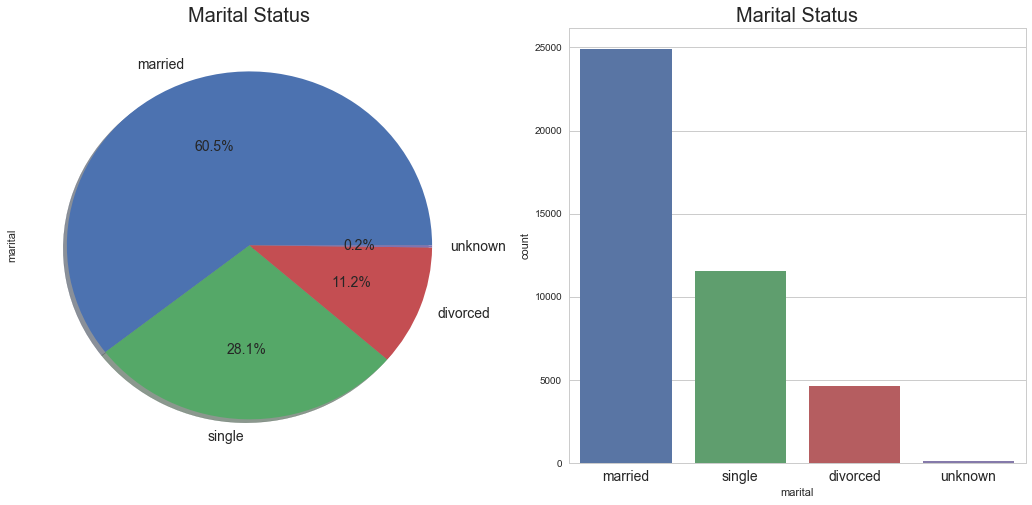

In [511]:
# 60.52% of the customers are married 
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = 'married','single','divorced','unknown'
data['marital'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True, colors=None, labels=labels,fontsize=14)
ax[0].set_title('Marital Status', fontsize=20)
sns.countplot('marital',data=data,ax=ax[1], palette=None)
ax[1].set_title('Marital Status', fontsize=20)
ax[1].set_xticklabels(['married','single','divorced','unknown'], fontsize=14)
plt.show()

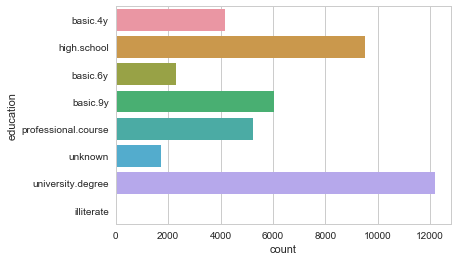

In [512]:
# Education (29.54% of the customers are possessing a university degree)
sns.countplot(y="education", data=data)
plt.show()

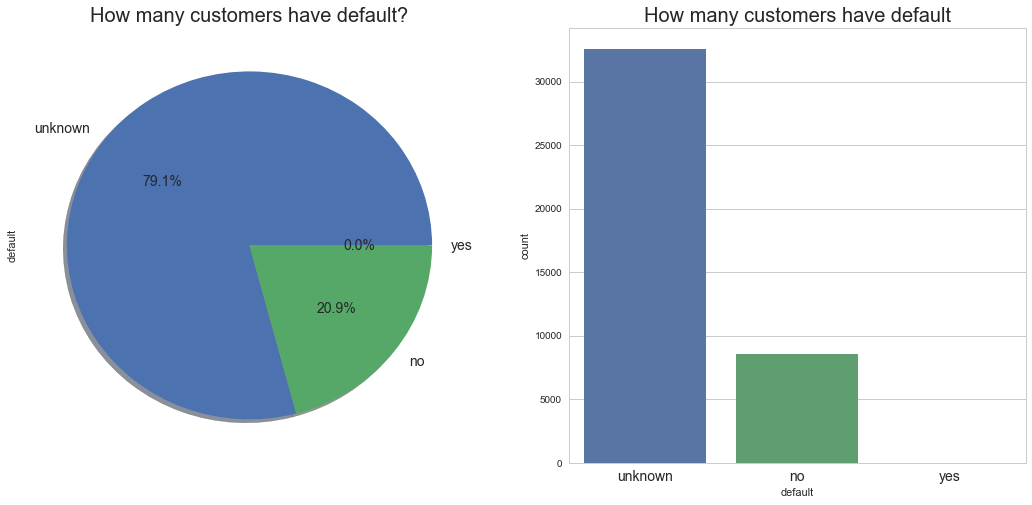

In [16]:
# 79% of the customers have no default
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = 'unknown','no','yes'
data['default'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True, colors=None, labels=labels,fontsize=14)
ax[0].set_title('How many customers have default?', fontsize=20)
sns.countplot('default',data=data,ax=ax[1], palette=None)
ax[1].set_title('How many customers have default', fontsize=20)
ax[1].set_xticklabels(['unknown','no','yes'], fontsize=14)
plt.show()

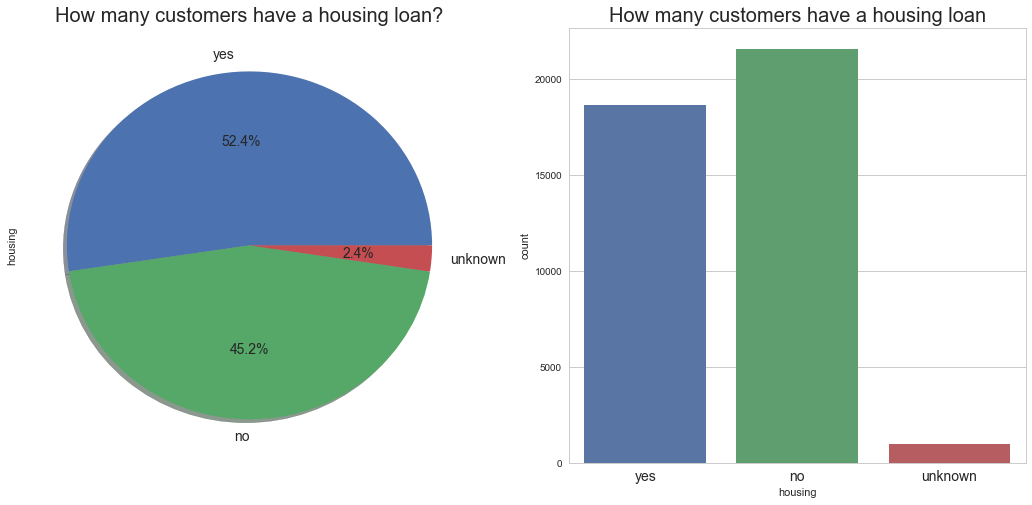

In [514]:
#52% of the customers have a housing loan

f,ax=plt.subplots(1,2,figsize=(18,8))
labels = 'yes','no','unknown'
data['housing'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True, colors=None, labels=labels,fontsize=14)
ax[0].set_title('How many customers have a housing loan?', fontsize=20)
sns.countplot('housing',data=data,ax=ax[1], palette=None)
ax[1].set_title('How many customers have a housing loan', fontsize=20)
ax[1].set_xticklabels(['yes','no','unknown'], fontsize=14)
plt.show()

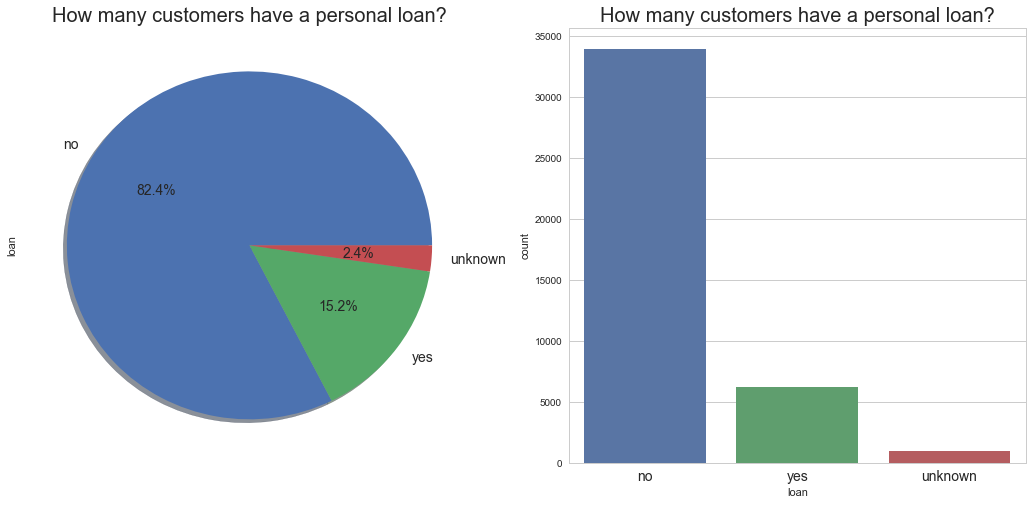

In [515]:
#82% of the customers do not have a personal loan

f,ax=plt.subplots(1,2,figsize=(18,8))
labels = 'no','yes','unknown'
data['loan'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True, colors=None, labels=labels,fontsize=14)
ax[0].set_title('How many customers have a personal loan?', fontsize=20)
sns.countplot('loan',data=data,ax=ax[1], palette=None)
ax[1].set_title('How many customers have a personal loan?', fontsize=20)
ax[1].set_xticklabels(['no','yes','unknown'], fontsize=14)
plt.show()

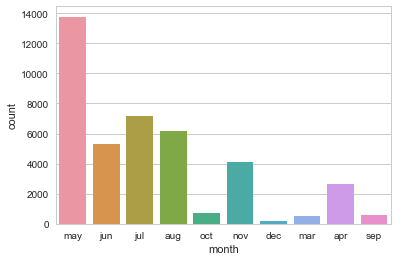

In [516]:
# Most contacts to the customer were made in the month of May
sns.countplot(x="month", data=data)
plt.show()

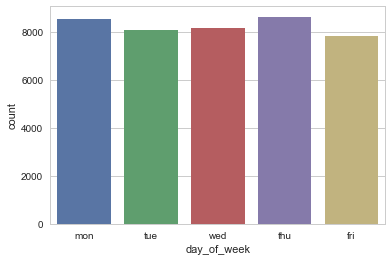

In [517]:
# Distribution of the days that last customer contact was made
sns.countplot(x="day_of_week", data=data)
plt.show()

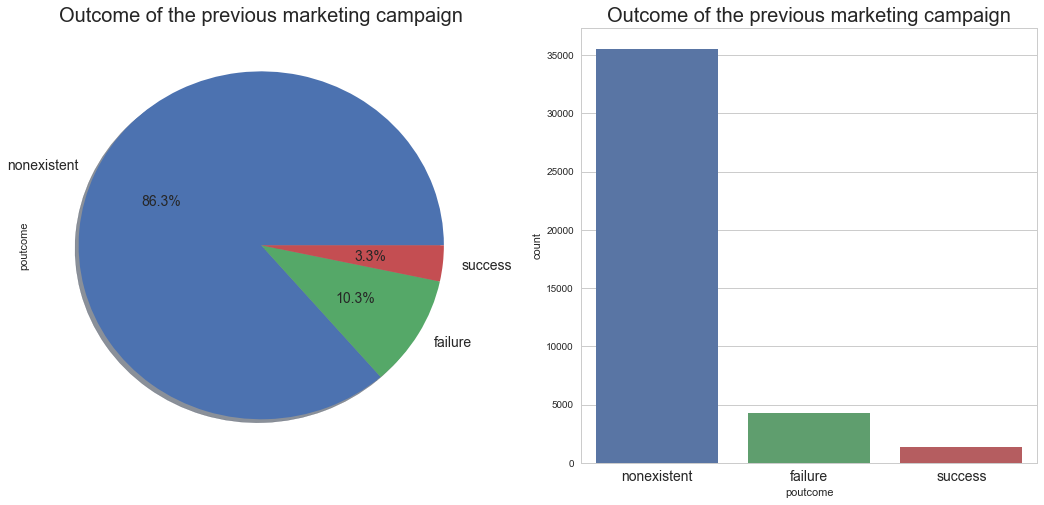

In [518]:
# Outcome of the previous marketing campaign does not exist for majority of the customers i.e. 86%
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = 'nonexistent','failure','success'
data['poutcome'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True, colors=None, labels=labels,fontsize=14)
ax[0].set_title('Outcome of the previous marketing campaign', fontsize=20)
sns.countplot('poutcome',data=data,ax=ax[1], palette=None)
ax[1].set_title('Outcome of the previous marketing campaign', fontsize=20)
ax[1].set_xticklabels(['nonexistent','failure','success'], fontsize=14)
plt.show()

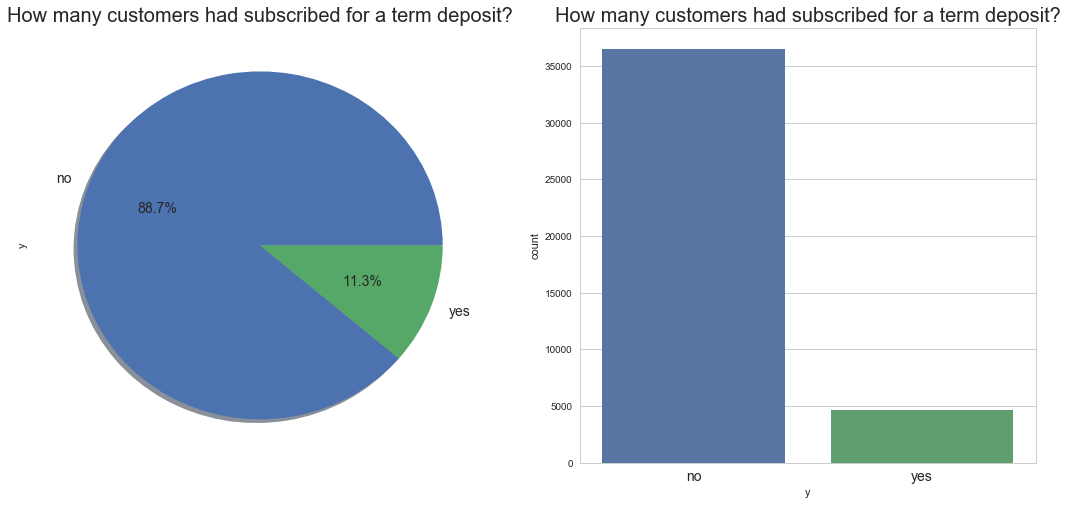

In [519]:
# Visualization of the column "Y".
# majority of the customers have not actually subscribed to a term deposit
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = 'no','yes',
data['y'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True, colors=None, labels=labels,fontsize=14)
ax[0].set_title('How many customers had subscribed for a term deposit?', fontsize=20)
sns.countplot('y',data=data,ax=ax[1], palette=None)
ax[1].set_title('How many customers had subscribed for a term deposit?', fontsize=20)
ax[1].set_xticklabels(['no','yes'], fontsize=14)
plt.show()

#### Further data exploration to review the acceptance of a term deposit or refusal

In [520]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:

1. The average age of customers who bought the term deposit is slighly higher than that of the customers who didn’t.
2. Campaigns (number of contacts or calls made during the current campaign) are higher for customers who did not opt for the term deposit.
3. Number of days since the client was last contacted in a previous campaign whichs is pdays is higher for customers who did not opt for the term desposit.

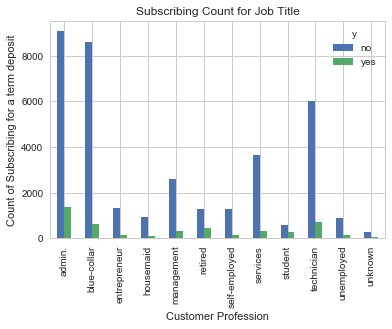

In [521]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Subscribing Count for Job Title')
plt.xlabel('Customer Profession')
plt.ylabel('Count of Subscribing for a term deposit')
plt.savefig('purchase_fre_job')

The frequency of subscription of the term deposit varies based on the customer's profession. Hence, the job title can be a good predictor of the outcome variable.

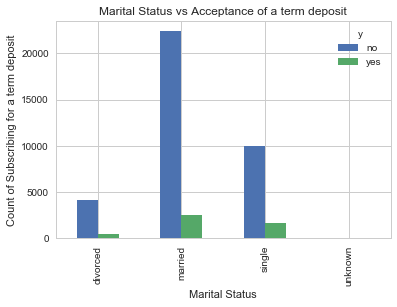

In [522]:
%matplotlib inline
pd.crosstab(data.marital,data.y).plot(kind='bar')
plt.title('Marital Status vs Acceptance of a term deposit')
plt.xlabel('Marital Status')
plt.ylabel('Count of Subscribing for a term deposit')
plt.savefig('marital_fre_job')

It seems that customers who are divorced show less tendency to open a term deposit.

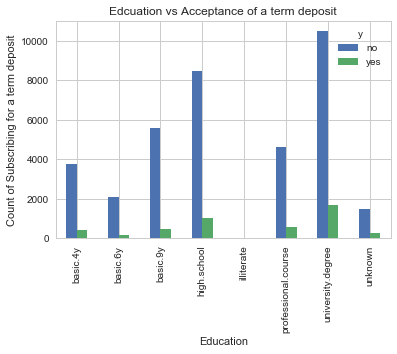

In [523]:
%matplotlib inline
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Edcuation vs Acceptance of a term deposit')
plt.xlabel('Education')
plt.ylabel('Count of Subscribing for a term deposit')
plt.savefig('edcuation_fre_job')

Education appears to be also a very good predictor of the outcome variable

Text(0,0.5,'Count of Subscribing for a term deposit')

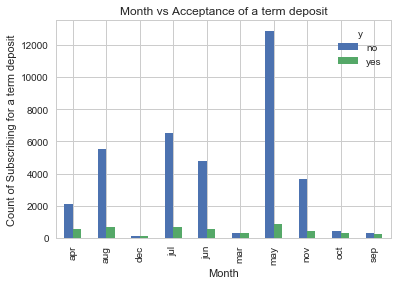

In [524]:
%matplotlib inline
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Month vs Acceptance of a term deposit')
plt.xlabel('Month')
plt.ylabel('Count of Subscribing for a term deposit')


Text(0,0.5,'Count of Subscribing for a term deposit')

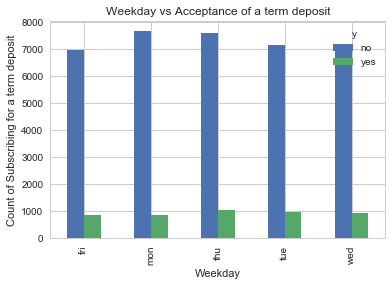

In [525]:
%matplotlib inline
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Weekday vs Acceptance of a term deposit')
plt.xlabel('Weekday')
plt.ylabel('Count of Subscribing for a term deposit')

Day of week and month may not be deciding factor for opening of a term deposit.

Text(0,0.5,'Frequency of Purchase')

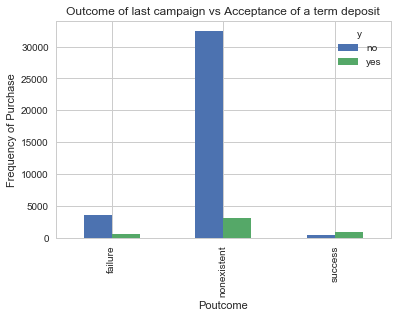

In [526]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Outcome of last campaign vs Acceptance of a term deposit')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

Text(0,0.5,'Frequency of Purchase')

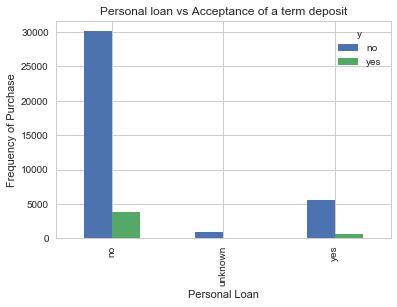

In [527]:
pd.crosstab(data.loan,data.y).plot(kind='bar')
plt.title('Personal loan vs Acceptance of a term deposit')
plt.xlabel('Personal Loan')
plt.ylabel('Frequency of Purchase')

Text(0,0.5,'Frequency of Purchase')

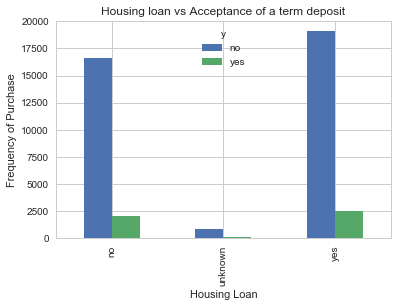

In [528]:
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Housing loan vs Acceptance of a term deposit')
plt.xlabel('Housing Loan')
plt.ylabel('Frequency of Purchase')

Text(0,0.5,'Frequency of Purchase')

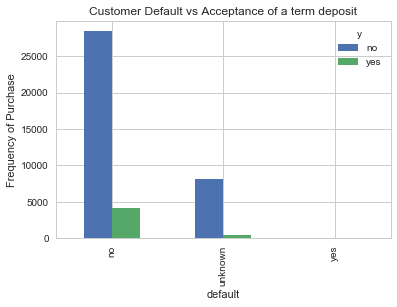

In [529]:
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.title('Customer Default vs Acceptance of a term deposit')
plt.xlabel('default')
plt.ylabel('Frequency of Purchase')

My expectation is that following features are relatively more relevant for predicting if a customer will subscribe for a term deposit or not.

1. Job - Customer's profession is also a good indicator for example students and unemployed are less likely to subscribe.

2. Education - Better educated customer could be aware of importance of saving money and might be likely to open a term deposit.

4. Marital Status - Married couples tend to have more dependancies and liabilities. It means they would also on focus term deposits which are less risky than equity marke as instruments of investments.

5. Default - I would assume that a customer in default will have less money at his/her disposal to open a term deposit.

6. Housing & Personal Loan - From a bank's perspective these are good features to consider so that bundled offers can be curated for customers. This increases the probablity that a customer might open a term deposit.

7. Previous - From a bank's perspective outcome of the last campaign -  is also a good feature to consider.

On the other hand, all the remaining features are not so relevant in my opinion. Notably attribute "duration" highly affects the output target (e.g., if duration=0 then y=no). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Therefore, I will drop all these features from consideration.


## Data Pre-Processing

In [3]:
# the education variable has got values such as basic.4y,basic.6y,basic.9y
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [4]:
# it will be best to treat those as "basic"
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [5]:
# after consolidation
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [6]:
# drop the features not to be considered further

data.drop(data.columns[[0,7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]],axis=1,inplace=True)

In [7]:
# create dummy variables
# dummy variables are those which have only binary values 0,1
data_new = pd.get_dummies(data, columns =['job','education', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [8]:
# Check which are the newly formed columns
data_new.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [9]:
# It will be good to drop columns with unknown values
# SO I will drop the columns such as job_unknown
data_new.drop(data_new.columns[[12,18,22,24,27,30]],axis=1,inplace=True)

In [10]:
# check the final columns 
data_new.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'education_Basic', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [11]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 29 columns):
y                                41188 non-null object
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician                   41188 non-null uint8
job_unemployed                   41188 non-null uint8
education_Basic                  41188 non-null uint8
education_high.school            41188 non-null uint8
education_illiterate             41188 non-null uint8
education_professional.course    41188 non-null uint8
education_university.degre

In [12]:
# Convert the output variable 'y' values to 0 or 1 and datatype 
data_new['y'] = data_new['y'].apply(lambda x: 0 if x == 'no' else 1)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 29 columns):
y                                41188 non-null int64
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician                   41188 non-null uint8
job_unemployed                   41188 non-null uint8
education_Basic                  41188 non-null uint8
education_high.school            41188 non-null uint8
education_illiterate             41188 non-null uint8
education_professional.course    41188 non-null uint8
education_university.degree

In [13]:
# Describe new data
data_new.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0


In [19]:
# Check the correlation
data_new.corr()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
y,1.000000,0.031426,-0.074423,-0.016644,-0.006505,-0.000419,0.092221,-0.004663,-0.032301,0.093955,...,0.054133,0.099344,-0.003041,-0.011085,0.011743,0.005123,-0.004466,0.031799,-0.193507,0.316269
job_admin.,0.031426,1.000000,-0.313313,-0.111417,-0.094595,-0.160892,-0.121502,-0.110021,-0.190063,-0.085748,...,0.117787,0.121336,-0.004967,-0.008529,0.011128,-0.015485,0.020088,0.002771,-0.015560,0.025069
job_blue-collar,-0.074423,-0.313313,1.000000,-0.103050,-0.087492,-0.148810,-0.112378,-0.101759,-0.175791,-0.079308,...,-0.100192,-0.176579,-0.004594,0.014033,-0.016031,0.003089,-0.006127,-0.013254,0.043843,-0.061403
job_entrepreneur,-0.016644,-0.111417,-0.103050,1.000000,-0.031113,-0.052918,-0.039962,-0.036186,-0.062513,-0.028203,...,-0.060245,0.000974,-0.001634,-0.004567,0.004287,0.004789,-0.005449,0.001595,0.007598,-0.017238
job_housemaid,-0.006505,-0.094595,-0.087492,-0.031113,1.000000,-0.044929,-0.033929,-0.030723,-0.053075,-0.023945,...,-0.060971,-0.036846,-0.001387,0.003620,-0.004689,0.001319,-0.002905,-0.017853,0.014629,0.002276
job_management,-0.000419,-0.160892,-0.148810,-0.052918,-0.044929,1.000000,-0.057708,-0.052255,-0.090272,-0.040726,...,-0.067364,0.035478,-0.002359,0.007787,-0.007896,0.000953,-0.001201,0.009056,-0.007343,-0.001302
job_retired,0.092221,-0.121502,-0.112378,-0.039962,-0.033929,-0.057708,1.000000,-0.039462,-0.068171,-0.030756,...,-0.105345,-0.010113,-0.001782,0.001549,-0.002189,0.005822,-0.007076,0.020917,-0.054113,0.068061
job_self-employed,-0.004663,-0.110021,-0.101759,-0.036186,-0.030723,-0.052255,-0.039462,1.000000,-0.061730,-0.027849,...,-0.005950,0.004812,-0.001613,-0.000392,-0.001166,0.005143,-0.007624,-0.000741,0.007385,-0.012871
job_services,-0.032301,-0.190063,-0.175791,-0.062513,-0.053075,-0.090272,-0.068171,-0.061730,1.000000,-0.048110,...,0.004078,-0.017667,-0.002787,0.003889,-0.004799,-0.000978,-0.000247,0.010347,0.005760,-0.028558
job_student,0.093955,-0.085748,-0.079308,-0.028203,-0.023945,-0.040726,-0.030756,-0.027849,-0.048110,1.000000,...,0.216639,0.032601,-0.001257,-0.004941,0.004261,-0.004971,0.004350,0.040214,-0.079189,0.083321


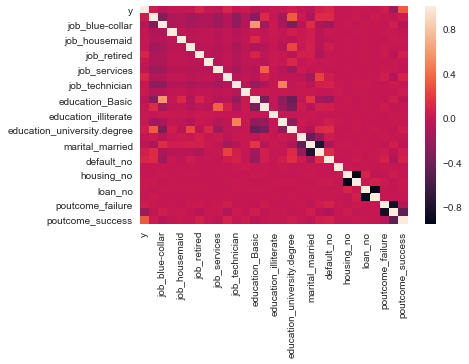

In [20]:
sns.heatmap(data_new.corr())
plt.show()
plt.savefig('corr')

As we see there are no correlations, I will not consider performing Principal component analysis (PCA).

### Develop a Logistics Regression Model

Logistic regression is mainly used in cases where the output is Boolean. So is the case under consideration, the desired target is either a customer subscribes for a term deposit or not. Here, we consider features and outcome Y which can take two values {0,1}. Logistic regression measures the relationship between an output variable Y (categorical) and one or more independent variables, which are usually (but not necessarily) continuous, by using probability scores as the predicted values of the dependent variable. So, logistics regression is my benchmark model.  

In [63]:
# Split the data_new into features and target label dataset
deposit = data_new['y']
features = data_new.drop('y', axis = 1)

In [64]:
# split the training and test data
X_train, X_test, y_train, y_test = train_test_split(features,deposit,test_size=0.30,random_state=42)

# Show the results of the split
print ('Training set has {} samples.'.format(X_train.shape[0]))
print ('Testing set has {} samples.'.format(X_test.shape[0]))

Training set has 28831 samples.
Testing set has 12357 samples.


In [65]:
# Fit the model to training data
classifier = LogisticRegression(random_state=0)
%time  classifier.fit(X_train, y_train)

Wall time: 145 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
# Predict the test results and plot confusion matrix
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10818   150]
 [ 1117   272]]


We can observe that there are 10818 + 272 correct predictions and 1117+150 incorrect predictions

In [39]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [40]:
# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.898


The average accuracy stays almost same as that of Logistic Regression model accuracy; hence, we can say that our model generalizes well.

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.94     10968
          1       0.64      0.20      0.30      1389

avg / total       0.88      0.90      0.87     12357



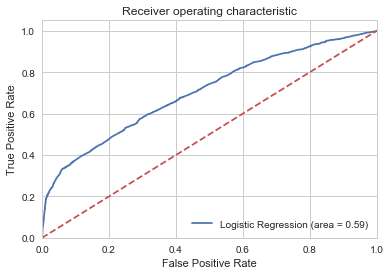

In [42]:
##Computing false and true positive rates

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [43]:
roc_auc_score(classifier.predict(X_test),y_test)

0.7754797411730602

We have got the score as 0.775 which seems to be fair

### Develop a Naive Bayes Model - Part 1

Naive Bayes classifiers have worked very well in many practical situations, famously known spam filtering. Naive Bayes also assumes that the features are conditionally independent.

In [44]:
# recreate the training and test data
X_train, X_test, y_train, y_test = train_test_split(features,deposit,test_size=0.30,random_state=14)

# Show the results of the split
print ('Training set has {} samples.'.format(X_train.shape[0]))
print ('Testing set has {} samples.'.format(X_test.shape[0]))

Training set has 28831 samples.
Testing set has 12357 samples.


In [45]:
# Fit the model to training data
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
nb = GaussianNB()

# Train the model using the training sets 
nb.fit(X_train, y_train)


GaussianNB(priors=None)

In [46]:
# Predict the test results and plot confusion matrix

%time y_pred_nb = nb.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_nb)

print(confusion_matrix)

Wall time: 13 ms
[[4366 6628]
 [ 273 1090]]


We can observe that there are 4366+1090 correct predictions and 6628+273 incorrect predictions

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_nb)

0.44153111596665856

In [48]:
# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=14)
modelCV = GaussianNB()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.444


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

             precision    recall  f1-score   support

          0       0.94      0.40      0.56     10994
          1       0.14      0.80      0.24      1363

avg / total       0.85      0.44      0.52     12357



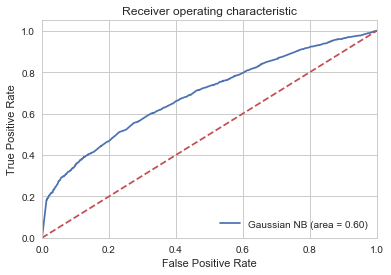

In [50]:
##Computing false and true positive rates

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, nb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gaussian NB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB')
plt.show()

In [51]:
roc_auc_score(nb.predict(X_test),y_test)

0.5411897038197229

We have got the score as 0.544 which seems to be poor.

### Develop a Naive Bayes Model - Part 2

It seems that the accuracy of the model with GaussianNB is not up to the mark.
BernoulliNB is designed for binary/boolean features. As we have samples represented as binary-valued features it will be interesting to model naive bayes classifier using BernoulliNB. Let me try this.

In [52]:
# let us recreate the training and test data
X_train, X_test, y_train, y_test = train_test_split(features,deposit,test_size=0.30,random_state=9)

# Show the results of the split
print ('Training set has {} samples.'.format(X_train.shape[0]))
print ('Testing set has {} samples.'.format(X_test.shape[0]))

Training set has 28831 samples.
Testing set has 12357 samples.


In [53]:
# Fit the model to training data
from sklearn.naive_bayes import BernoulliNB

#Create a Classifier
bnb =  BernoulliNB()

# Train the model using the training sets 
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [54]:
# Predict the test results and plot confusion matrix

%time y_pred_bnb = bnb.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_bnb)

print(confusion_matrix)

Wall time: 7.98 ms
[[10685   263]
 [ 1112   297]]


We can observe that there are 10685+297 correct predictions and 263+1112 incorrect predictions

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bnb)

0.8887270373067897

In [56]:
# Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=14)
modelCV = BernoulliNB()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.889


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bnb))

             precision    recall  f1-score   support

          0       0.91      0.98      0.94     10948
          1       0.53      0.21      0.30      1409

avg / total       0.86      0.89      0.87     12357



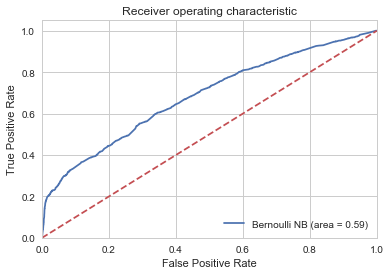

In [58]:
##Computing false and true positive rates

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, bnb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bnb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bernoulli NB (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('bNB')
plt.show()

In [59]:
roc_auc_score(bnb.predict(X_test),y_test)

0.7180479449981231

We have got the score as 0.718 which seems to be fair.

### Implementation - Extracting Feature Importance

I am choosing a scikit-learn supervised learning algorithm RandomForestClassifier that has a feature_importance_ attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm. This will be a good exercise to do.

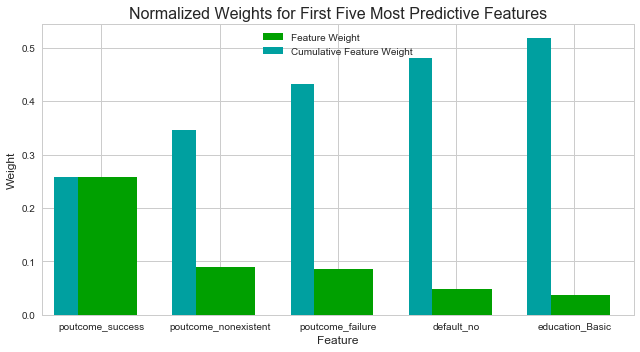

In [60]:
# Import supplementary visualization code visuals.py
import visuals as vs

# Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier().fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Summary

| Comparison Parameter        | Logistics Regression | Naive Bayes (Gaussian)| Naive Bayes(Bernoulli)|
| ----------------------------|:--------------------:| ---------------------:|----------------------:|
| Avg. accuracy               | 0.90                 | 0.441                 | 0.888                 |
| 10 fold CV avg. accuracy    | 0.898                | 0.444                 | 0.889                 |
| ROC/AUC Score               | 0.775                | 0.542                 | 0.71                  |
| f1-score (avg/total)        | 0.87                 | 0.52                  | 0.87                  |
| wall time                   | 145 ms               | 13 ms                 | 7.98 ms               |


###### Key Remarks:
Logistics regession was the benchmark model of this project while naive bayes was the solution model. As we see above comparison, naive bayes using Bernoulli came very closer to the benchmark model when we consider accuracy,roc/auc score and f1-score. However, when it came to wall time naive bayes using Bernoulli was the fastest. This is in line with the thoery where I learned the most appealing stregnth of Naive Bayes model is that it is relatively faster.
Generally speaking, I believe the final solution model and solution is good enough to apply to the given problem statement.

###### Feature Importance:
Althugh focus of this project was on logistics regression and naive bayes for classification, I took the liberty to try supervised learning algorithm Random Forest Classifier that has a feature importance attribute availble. Ths result of this suggests that below are important features (ordered according to the weight)

<ul>
<li>Outcome of the previous marketing campaign (success/nonexistent/failure)</li>
<li>If the customer has credit in default?</li>
<li>Customer's education.</li>
</ul>

###### Recommendations to the bank:

I would like to make the following recommendations to the bank:

<ul>
<li>Ensure that customers are not annoyed with frequent calls. Therefore, it is important to keep the number contacts per customer to an optimum level. This should be supplemented with the bank employee doing his/her homework/preparation about the prospective customer very well.</li>
<li>Prioritize to first tap customers who are married and single.</li>
<li>With regards to customer's profession it is good to first start with retired people followed by customers in the profession such as admin,services,blue-collar.</li>
<li>Ensure that not much time is elapsed after a first contact with a customer is made.</li>
<li>Contacting first the customers who are not defaulters is a common banking sense that should prevail.</li> 
<li>It will be great that bank's marketing department thinks about having some interesting offers for existing customers with home loan or personal loan e.g. offering 0.25% higher rate of return than usual.</li>
<li>Bank's direct marketing department then should contact those customers where the previous campaian was successful. This is a good priorization and optimization of direct marketing efforts</li>    
</ul>


###### References:
    
https://medium.com/@sangha_deb/naive-bayes-vs-logistic-regression-a319b07a5d4c

http://scikit-learn.org/stable/modules/naive_bayes.html

https://en.wikipedia.org/wiki/Direct_marketing

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

https://pdfs.semanticscholar.org/a911/cbe221347b400d1376330591973bb561ff3a.pdf

https://pdfs.semanticscholar.org/cab8/6052882d126d43f72108c6cb41b295cc8a9e.pdf

http://gim.unmc.edu/dxtests/roc3.htm
    